# Классификатор фруктов

## Импорт библиотек

In [12]:
from torch.utils.data import DataLoader

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import pathlib

## Проверка папок

In [13]:
root = pathlib.Path(r'C:\Users\morph\Desktop\fruit_classifier\train_dataset')
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)

['apple', 'banana', 'grape', 'mango', 'orange', 'peach']


## Предварительная обработка данных

In [14]:
train_transform = torchvision.datasets.ImageFolder(root=pathlib.Path(r'C:\Users\morph\Desktop\fruit_classifier\train_dataset'), transform=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(size=256),
    transforms.RandomAffine(degrees=(10, 45)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=(10, 70)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
    ])
)


valid_transform = torchvision.datasets.ImageFolder(root=pathlib.Path(r'C:\Users\morph\Desktop\fruit_classifier\valid_dataset'), transform=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(size=256),
    transforms.RandomAffine(degrees=(10, 45)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=(10, 70)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
    ])
)

In [15]:
train_dataloader = torch.utils.data.DataLoader(train_transform, batch_size=8, shuffle=True, num_workers=0, pin_memory=False)
valid_dataloader = torch.utils.data.DataLoader(valid_transform, batch_size=8, shuffle=True, num_workers=0, pin_memory=False)

## Отображение экземпляров из тренировочного и тестового набора данных

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


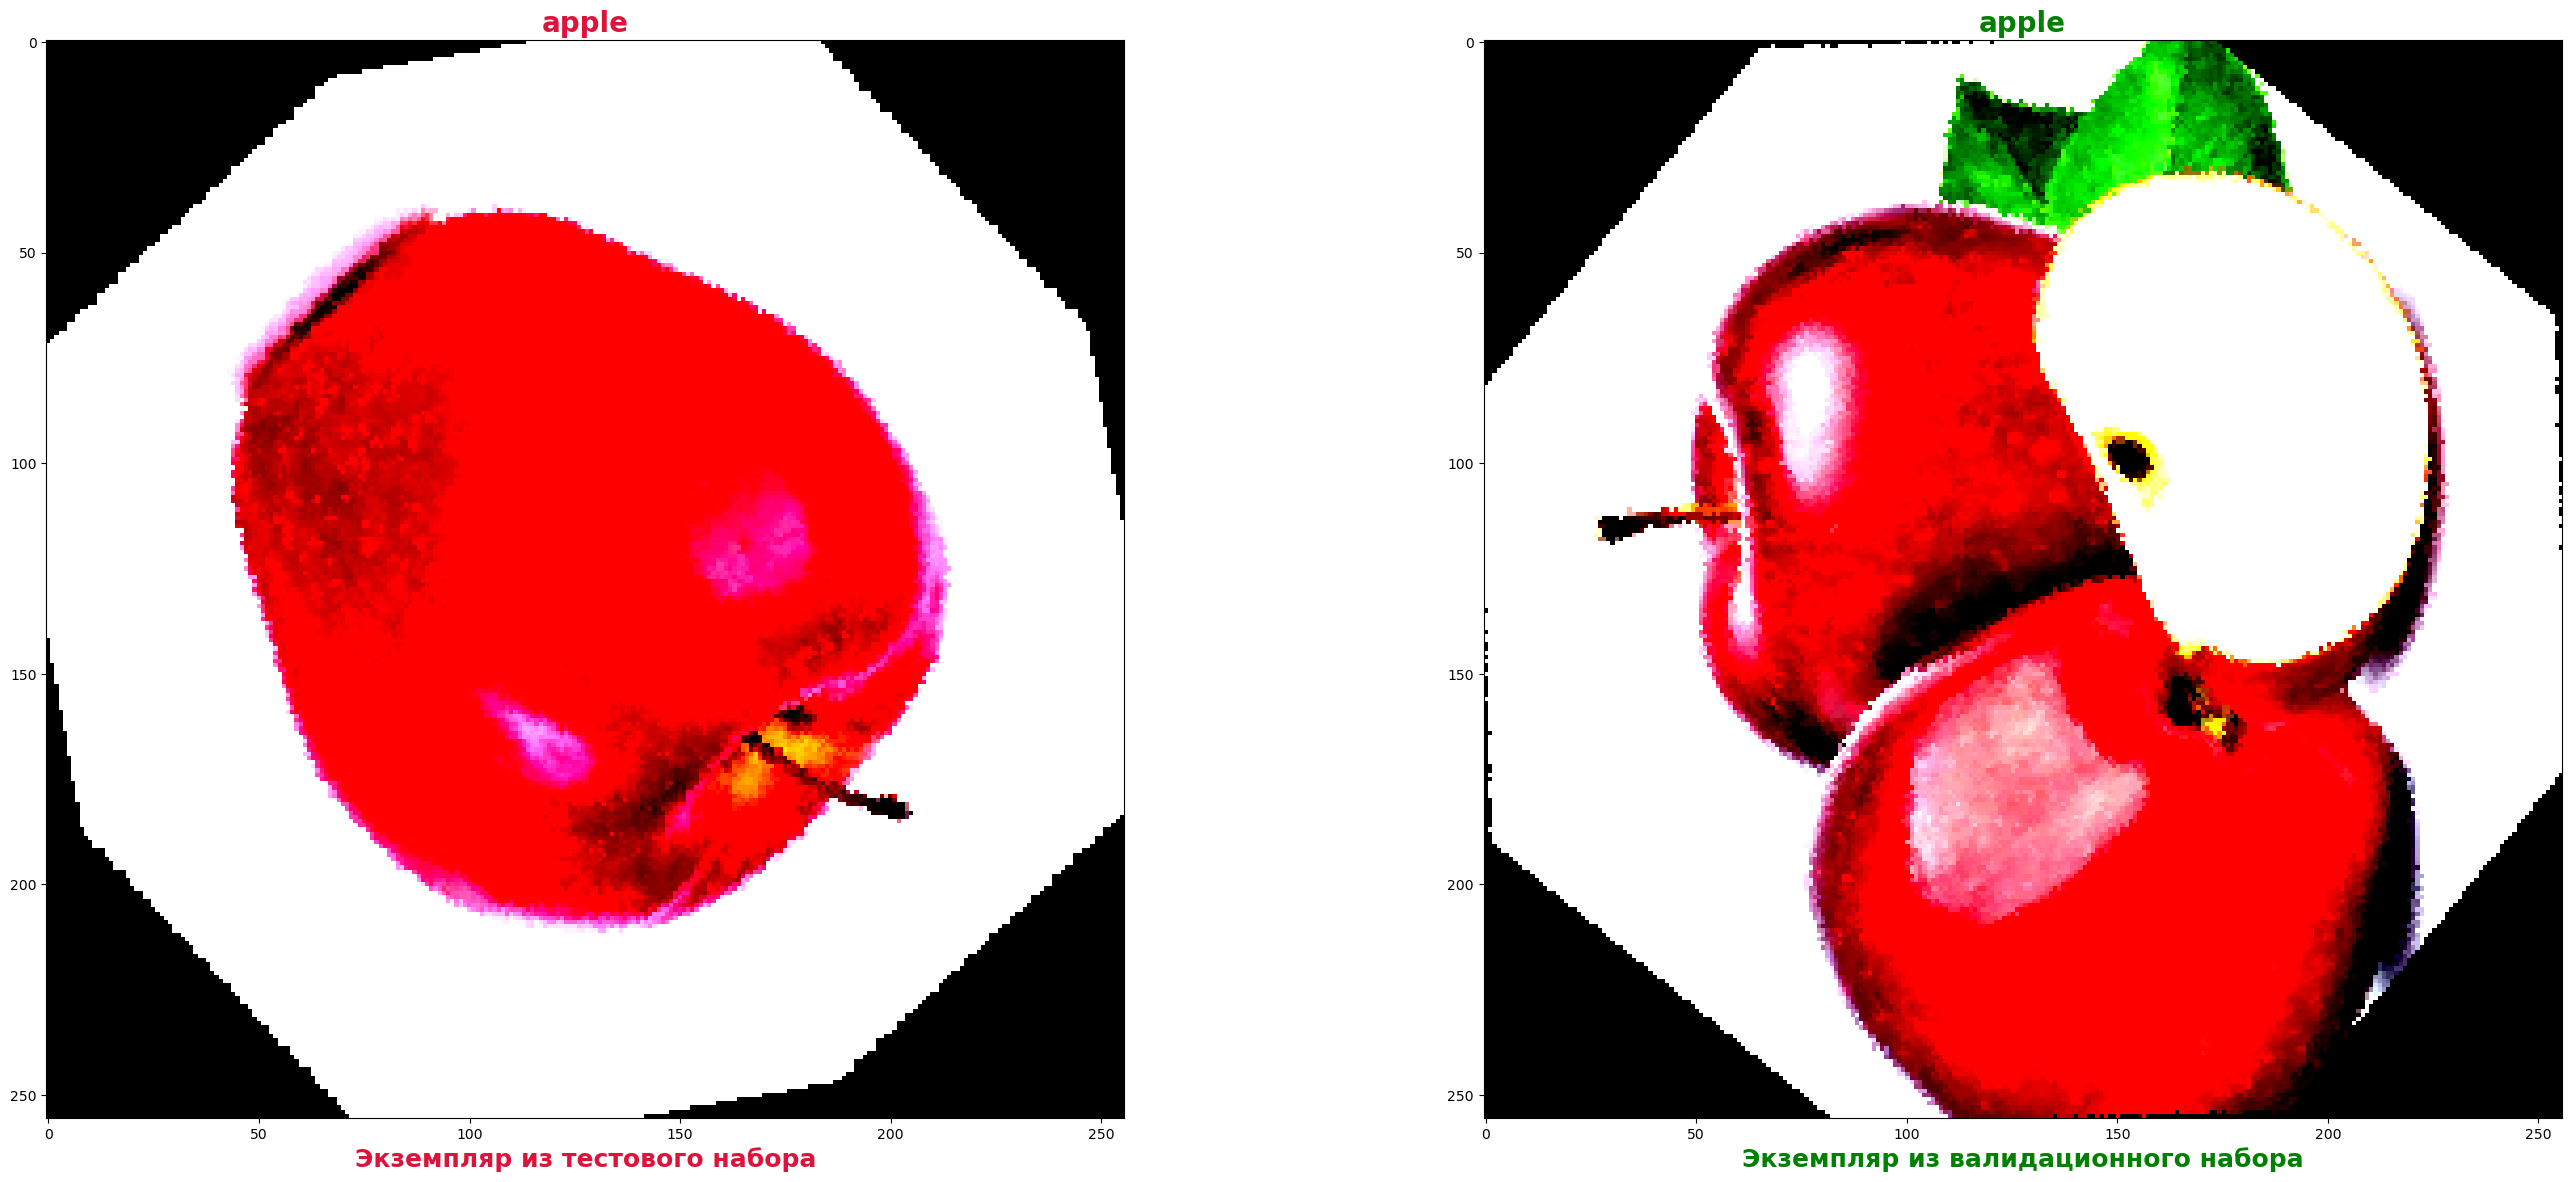

In [16]:
labels_map = {0: 'apple',
              1: 'banana',
              2: 'grape',
              3: 'mango',
              4: 'orange',
              5: 'peach'}

figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(34, 14))

train_sample = torch.randint(len(train_transform), size=(1, )).item()
img_1, label_1 = train_transform[train_sample]
ax1.set_xlabel('Экземпляр из тестового набора', fontsize='18', color='crimson', fontweight='heavy')
ax1.set_title(labels_map[label_1], fontsize='20', color='crimson', fontweight='heavy')
ax1.imshow(img_1.squeeze().permute(1, 2, 0))

valid_sample = torch.randint(len(valid_transform), size=(1, )).item()
img_2, label_2 = valid_transform[valid_sample]
ax2.set_xlabel('Экземпляр из валидационного набора', fontsize='18', color='green', fontweight='heavy')
ax2.set_title(labels_map[label_2], fontsize='20', color='green', fontweight='heavy')

ax2.imshow(img_2.permute(1, 2, 0))

## Реализация сверточной нейронной сети

In [17]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()


        # 1 блок
        self.conv10 =  nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=1)
        self.btcn10 = nn.BatchNorm2d(16)
        self.relu10 = nn.ReLU()

        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)


        # 2 блок
        self.drop = nn.Dropout2d(p = 0.5)
        self.conv20 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.btcn20 = nn.BatchNorm2d(16)
        self.relu20 = nn.ReLU()

        self.drop = nn.Dropout2d(p = 0.5)
        self.conv21 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.btcn21 = nn.BatchNorm2d(16)
        self.relu21 = nn.ReLU()

        self.drop = nn.Dropout2d(p = 0.5)
        self.conv22 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.btcn22 = nn.BatchNorm2d(32)
        self.relu22 = nn.ReLU()


        # 3 блок
        self.drop = nn.Dropout2d(p = 0.5)
        self.conv30 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.btcn30 = nn.BatchNorm2d(32)
        self.relu30 = nn.ReLU()

        self.drop = nn.Dropout2d(p = 0.5)
        self.conv31 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.btcn31 = nn.BatchNorm2d(32)
        self.relu31 = nn.ReLU()

        self.drop = nn.Dropout2d(p = 0.5)
        self.conv32 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.btcn32 = nn.BatchNorm2d(64)
        self.relu32 = nn.ReLU()


        # 4 блок
        self.drop = nn.Dropout2d(p = 0.5)
        self.conv40 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.btcn40 = nn.BatchNorm2d(64)
        self.relu40 = nn.ReLU()

        self.drop = nn.Dropout2d(p = 0.5)
        self.conv41 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.btcn41 = nn.BatchNorm2d(64)
        self.relu41 = nn.ReLU()

        self.drop = nn.Dropout2d(p = 0.5)
        self.conv42 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.btcn42 = nn.BatchNorm2d(128)
        self.relu42 = nn.ReLU()


        # 5 блок
        self.drop = nn.Dropout2d(p = 0.5)
        self.conv50 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.btcn50 = nn.BatchNorm2d(128)
        self.relu50 = nn.ReLU()

        self.drop = nn.Dropout2d(p = 0.5)
        self.conv51 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.btcn51 = nn.BatchNorm2d(128)
        self.relu51 = nn.ReLU()

        self.drop = nn.Dropout2d(p = 0.5)
        self.conv52 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.btcn52 = nn.BatchNorm2d(128)
        self.relu52 = nn.ReLU()

        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        # 6 блок
        self.avgpool = nn.AvgPool2d(kernel_size=7, stride=8)
        self.conv60 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1)
        self.btcn60 = nn.BatchNorm2d(256)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features=12544, out_features=6)



    def forward(self, x):


        #1 блок
        x = self.relu10(self.conv10(x))
        x = self.btcn10(x)

        x = self.pool1(x)


        #2 блок
        x = self.drop(x)
        x = self.relu20(self.conv20(x))
        x = self.btcn20(x)

        x = self.drop(x)
        x = self.relu21(self.conv21(x))
        x = self.btcn21(x)

        x = self.drop(x)
        x = self.relu22(self.conv22(x))
        x = self.btcn22(x)


        #3 блок
        x = self.drop(x)
        x = self.relu30(self.conv30(x))
        x = self.btcn30(x)

        x = self.drop(x)
        x = self.relu31(self.conv31(x))
        x = self.btcn31(x)

        x = self.drop(x)
        x = self.relu32(self.conv32(x))
        x = self.btcn32(x)


        #4 блок
        x = self.drop(x)
        x = self.relu40(self.conv40(x))
        x = self.btcn40(x)

        x = self.drop(x)
        x = self.relu41(self.conv41(x))
        x = self.btcn41(x)

        x = self.drop(x)
        x = self.relu42(self.conv42(x))
        x = self.btcn42(x)


        #5 блок
        x = self.drop(x)
        x = self.relu50(self.conv50(x))
        x = self.btcn50(x)

        x = self.drop(x)
        x = self.relu51(self.conv51(x))
        x = self.btcn51(x)

        x = self.drop(x)
        x = self.relu52(self.conv52(x))
        x = self.btcn52(x)

        x = self.pool2(x)


        #6 слой
        x = self.avgpool(x)
        x = self.conv60(x)
        x = self.btcn60(x)
        x = self.flatten(x)
        x = self.linear(x)

        return  x


cnn_model = CNNModel()

## Вычисление точности на итерации

In [18]:
# определим функцию, которая будет вычислять точность модели на итерации
def calculate_accuracy(y_pred, y):

    # находим количество верных совпадений лейбла и выходного класса по каждому примеру в батче
    top_pred = y_pred.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()

    # посчитаем точность, которая равна отношению количества верных совпадений к общему числу примеров в батче
    accuracy = correct.float() / y.shape[0]
    return accuracy

## Цикл обучения

In [19]:
# функция, отвечающая за обучение сети на одной эпохе
def train_loop(train_loop_model, train_loop_dataloader, train_loop_optimizer, train_loop_loss_function, train_loop_device):

    # определим значения точности и потерь на старте эпохи
    epoch_accuracy = 0
    epoch_loss = 0

    # переведем модель в режим тренировки
    train_loop_model.train()

    # для каждого батча в даталоадере
    for (images, labels) in train_loop_dataloader:

        # отправляем изображения и метки на устройство
        images = images.to(train_loop_device)
        labels = labels.to(train_loop_device)

        # обнуляем градиенты
        train_loop_optimizer.zero_grad()

        # вычислим выходы сети на данном батче
        predicts = train_loop_model(images)

        # вычислим величину потерь на данном батче
        loss = train_loop_loss_function(predicts, labels)

        # вычислим точность на данном батче
        accuracy = calculate_accuracy(predicts, labels)

        # вычислим значения градиентов на батче
        loss.backward()

        # корректируем веса
        train_loop_optimizer.step()

        # прибавим значения потерь и точности на батче
        epoch_loss += loss.item()
        epoch_accuracy  += accuracy.item()

    # возвращаем величину потерь и точность на эпохе
    return epoch_loss / len(train_loop_dataloader),  epoch_accuracy / len(train_loop_dataloader)

## Проверка модели на одной эпохе

In [20]:
# функция, отвечающая за проверку модели на одной эпохе
def evaluate(evaluate_model, evaluate_dataloader, evaluate_loss_function, evaluate_device):

    # определим начальные величины потерь и точности
    epoch_accuracy = 0
    epoch_loss = 0
    # переведем модель в режим валидации
    evaluate_model.eval()

    # указываем, что градиенты вычислять не нужно
    with torch.no_grad():

        # для каждого батча в даталоадере
        for images, labels in evaluate_dataloader:

            # переносим изображения и лейблы на устройство
            images = images.to(evaluate_device)
            labels = labels.to(evaluate_device)

            # вычислим выходы сети на батче
            predicts = evaluate_model(images)

            # вычислим величину потерь на батче
            loss = evaluate_loss_function(predicts, labels)

            # вычислим точность на батче
            accuracy  = calculate_accuracy(predicts, labels)

            # прибавим значения потерь и точности на батче к общему
            epoch_loss += loss.item()
            epoch_accuracy  += accuracy.item()

    # возвращаем величину потерь и точность на эпохе
    return epoch_loss / len(evaluate_dataloader),  epoch_accuracy / len(evaluate_dataloader)

## Оптимизатор, функция потерь и архитектура модели

In [21]:
# определим функцию оптимизации
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# определим функцию потерь
loss_function = nn.CrossEntropyLoss()

# определим устройство, на котором будет идти обучение
device = None
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# перемещение модели на устройство
cnn_model.to(device)

cuda


CNNModel(
  (conv10): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (btcn10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu10): ReLU()
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.5, inplace=False)
  (conv20): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btcn20): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu20): ReLU()
  (conv21): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btcn21): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu21): ReLU()
  (conv22): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btcn22): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu22): ReLU()
  (conv30): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (btcn30): BatchNorm2d(32, e

In [22]:
epochs = 25
loss_list = []
for epoch in range(epochs):
    train_loss, train_acc = train_loop(cnn_model, train_dataloader, optimizer, loss_function, device)
    test_loss, test_acc   = evaluate(cnn_model, valid_dataloader, loss_function, device)
    loss_list.append(test_loss)
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc * 100:.2f}%')
    print(f'\t Val. Loss: {test_loss:.3f} |  Val. Acc: {test_acc * 100:.2f}%')

Epoch: 01
	Train Loss: 3.766 | Train Acc: 18.45%
	 Val. Loss: 5.471 |  Val. Acc: 15.62%
Epoch: 02
	Train Loss: 4.391 | Train Acc: 20.54%
	 Val. Loss: 3.719 |  Val. Acc: 23.44%
Epoch: 03
	Train Loss: 4.357 | Train Acc: 19.35%
	 Val. Loss: 4.457 |  Val. Acc: 12.50%
Epoch: 04
	Train Loss: 4.557 | Train Acc: 19.35%
	 Val. Loss: 4.984 |  Val. Acc: 3.12%
Epoch: 05
	Train Loss: 4.781 | Train Acc: 18.45%
	 Val. Loss: 4.104 |  Val. Acc: 20.31%
Epoch: 06
	Train Loss: 5.129 | Train Acc: 18.15%
	 Val. Loss: 2.799 |  Val. Acc: 12.50%
Epoch: 07
	Train Loss: 4.834 | Train Acc: 18.45%
	 Val. Loss: 3.687 |  Val. Acc: 20.31%
Epoch: 08
	Train Loss: 5.046 | Train Acc: 16.67%
	 Val. Loss: 7.579 |  Val. Acc: 18.75%
Epoch: 09
	Train Loss: 4.631 | Train Acc: 19.05%
	 Val. Loss: 4.166 |  Val. Acc: 14.06%
Epoch: 10
	Train Loss: 4.476 | Train Acc: 19.94%
	 Val. Loss: 4.217 |  Val. Acc: 20.31%
Epoch: 11
	Train Loss: 4.592 | Train Acc: 17.56%
	 Val. Loss: 4.397 |  Val. Acc: 14.06%
Epoch: 12
	Train Loss: 4.256 | Tr

KeyboardInterrupt: 